In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
def readData(filename):
    df = pd.read_csv(filename)
    df.head(n=5)
    return df.values
def normalize(d):
    d = (d - d.mean())/d.std()
    return d

x = readData('./data/linearX.csv')
x = normalize(x)
y = readData('./data/linearY.csv')

In [50]:
x = x.reshape((99,))
y = y.reshape((99,))



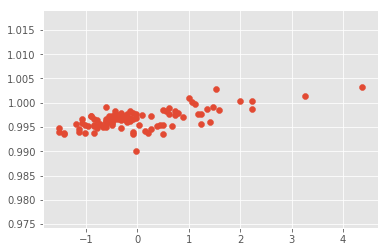

In [51]:
plt.style.use('ggplot')
plt.scatter(x,y)
plt.show()

In [52]:
def hypothesis(theta,x):
    return theta[0] + theta[1]*x

def error(X,Y,theta):
    
    no_of_samples = X.shape[0]
    error = 0
    for i in range(no_of_samples):
        hx = hypothesis(theta,x[i])
        error += (Y[i] - hx)**2
    
    return error/2.0

def gradient(X,Y,theta):
    
    grad = np.array([0.0,0.0])
    
    for i in range(X.shape[0]):
        hxi = hypothesis(theta,X[i])
        grad[0] += (Y[i] - hxi)
        grad[1] += (Y[i]-hxi)*X[i]
    
    return grad
    

def gradientDescent(X,Y,learning_rate,maxItr):
    theta = np.array([0.0,0.0])
    grad = np.array([0.0,0.0])
    error_list = []
    for i in range(maxItr):
        #Do Gradient Descent
        grad = gradient(x,y,theta)
        theta[0] = theta[0] + learning_rate*grad[0]
        theta[1] = theta[1] + learning_rate*grad[1]
        
        error_list.append(error(X,Y,theta))
    
    
    return theta,error_list
    
    

In [90]:
theta,errors = gradientDescent(x,y,0.0001,1000)

In [91]:
print(theta)

[0.99658654 0.00135787]


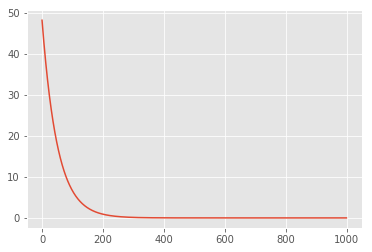

In [92]:
plt.plot(errors)

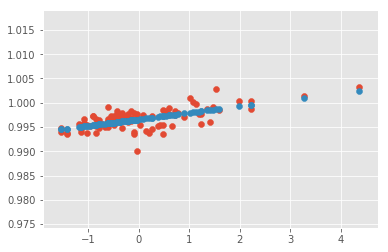

In [93]:
plt.scatter(x,y)
plt.scatter(x,hypothesis(theta,x))
plt.show()

In [64]:
X = np.arange(-4, 4, .2)
Y = np.arange(-4, 4, .2)
X, Y = np.meshgrid(X, Y)

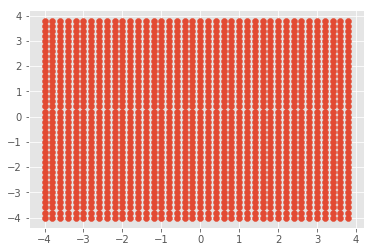

In [65]:
plt.scatter(X,Y)